***Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+***

***Задача***

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

***План выполнения задачи***

Изучить:
1. откуда приходят пользователи и какими устройствами они пользуются,
2. сколько стоит привлечение пользователей из различных рекламных каналов;
3. сколько денег приносит каждый клиент,
4. когда расходы на привлечение клиента окупаются,
5. какие факторы мешают привлечению клиентов.

# Содержание
* [Загрузка данных и предобработка](#chapter1)
* [Исследовательский анализ данных](#chapter2)
* [Маркетинг](#chapter4)
* [Оценка окупаемости рекламы](#chapter5)
* [Заключение](#chapter6) 

Входные данные

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

лог сервера с данными об их посещениях (файл visits_info_short.csv)
User Id — уникальный идентификатор пользователя,
Region — страна пользователя,
Device — тип устройства пользователя,
Channel — идентификатор источника перехода,
Session Start — дата и время начала сессии,
Session End — дата и время окончания сессии;

выгрузка их покупок за этот период (файл orders_info_short.csv)
User Id — уникальный идентификатор пользователя,
Event Dt — дата и время покупки,
Revenue — сумма заказа;

рекламные расходы (файл costs_info_short.csv)
Channel — идентификатор рекламного источника,
Dt — дата проведения рекламной кампании,
Costs — расходы на эту кампанию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

### Загрузите данные и подготовьте их к анализу <a class="anchor" id="chapter1">
</a>

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


в датасете имеются 309901 строк;

отсутствуют дубликаты и пропуски;названия колонок не соответствует стандартному обознначений (snake_case)

тип данных столбцов 'Session Start' и 'Session End' не оответствуют сохранённым в них значениям

In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


в датасете имеются 40212 строк;

отсутствуют явные дубликаты и пропуски;

названия колонок не соответствует стандартному обознначений (snake_case)

тип данных столбца 'Event Dt' не оответствуют сохранённым в нем значениям

In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


в датасете имеются 1800 строк;

отсутствуют явные дубликаты и пропуски;

названия колонок не соответствует стандартному обознначений (snake_case)

тип данных столбца 'dt' не оответствуют сохранённым в нем значениям

***Предобработка данных***

Приведем название колонок к единому регистру

In [5]:
costs.columns = costs.columns.str.lower()
orders.columns = orders.columns.str.lower()
visits.columns = visits.columns.str.lower()
costs.columns = costs.columns.str.replace(" ", "_")
orders.columns = orders.columns.str.replace(" ", "_")
visits.columns = visits.columns.str.replace(" ", "_")

Преобразуем данные во времени в datetime, для более удобной работы в дальнейшем

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим наличие дупликатов

In [7]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Проверим наличие пропущенных данных

In [8]:
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

По результатам предобработки были выполнены следующие действия:
названия столбцов приведены к стандартному виду;

типы временных данных приведены к нцжному типу;
 
В целом данных предосатвлены в хорошем виде, отсутствуют пропуски и дубликаты

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии. <a class="anchor" id="chapter2">
</a>

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Создание функции get_profiles()

In [9]:
def get_profiles (sessions, orders, ad_costs):
    # найдем параметры всех первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg({
                    'session_start': 'first',
                    'channel': 'first',
                    'device': 'first',
                    'region': 'first'
                })
                .rename(columns={'session_start': 'first_ts'})
                .reset_index()
               )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Задаем функцию дял расчета удержания - Retention Rate

In [10]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчета конверсии

In [11]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчета LTV и ROI

In [12]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функции для построения графиков

In [13]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Визуализация конверсии

In [15]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Визуализация LTV и ROI

In [16]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 20))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных <a class="anchor" id="chapter3">
</a>

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

***Профили пользователей***

In [17]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))
display('количество профилей:', len(profiles))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


'количество профилей:'

150008

In [18]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print(min_analysis_date,max_analysis_date)

2019-05-01 2019-10-27


Минимальная дата привлечения пользователей 2019-05-01

Максимальная дата привлечения пользователей 2019-10-27

Согласно заданию, анализ необходимо провести по состоянию на 1 ноября 2019 года, но т.к. наша выгрузка содержит данные по 27 октября 2019, возьмем эту дату.
Так же, в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через две недели после привлечения.

***Анализ пользователей по странам***
 
 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны и визуализируем ее.

In [19]:
profiles_by_region = (
    profiles.groupby('region')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_by_region['region%'] = profiles_by_region['user_id'] / profiles_by_region['user_id'].sum()
profiles_by_region['payers%'] = profiles_by_region['payer'] / profiles_by_region['user_id']

profiles_by_region = profiles_by_region.sort_values(by='user_id', ascending=False)

profiles_by_region[['region%', 'payers%']] = profiles_by_region[['region%', 'payers%']].round(2)
profiles_by_region

,region,user_id,payer,region%,payers%
3,United States,100002,6902,0.67,0.07
2,UK,17575,700,0.12,0.04
0,France,17450,663,0.12,0.04
1,Germany,14981,616,0.10,0.04


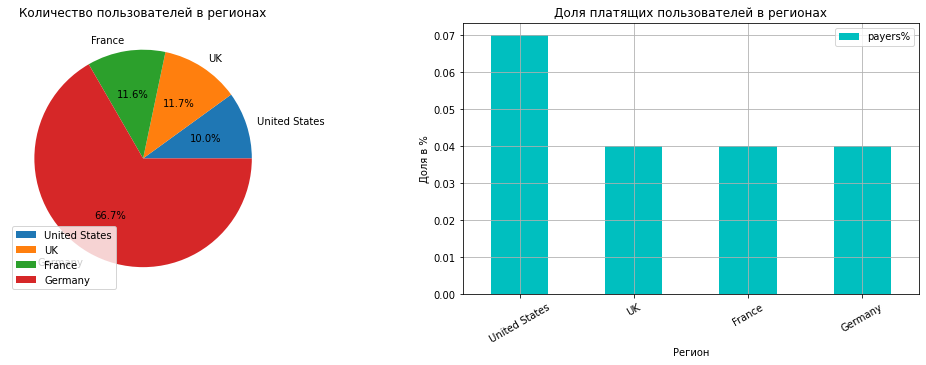

In [20]:
plt.figure(figsize=(18, 5))

# построим круговую диаграмму для доли всех пользователей
ax1 = plt.subplot(1, 2, 1)
profiles_by_region.sort_values(by='region%', ascending=True).plot.pie(
    y='user_id', labels=profiles_by_region['region'], autopct='%1.1f%%',
    title='Количество пользователей в регионах', ax=ax1
).set(ylabel=None)

# построим столбчатую диаграмму для доли платящих пользователей в рамках региона
ax2 = plt.subplot(1, 2, 2)
profiles_by_region.sort_values(by='payers%', ascending=False).plot.bar(
    x='region', y=['payers%'], grid=True,
    title='Доля платящих пользователей в регионах',
    rot=30, color='c', ax=ax2
).set(xlabel='Регион', ylabel='Доля в %')
plt.show()

Самым популярным среди пользователей является iPhone, который используется более чем 36% пользователей. Однако, стоит отметить, что остальные устройства распределены довольно равномерно среди пользователей.

В отношении доли платящих пользователей, интересно отметить, что она распределена более равномерно между различными устройствами. Например, у пользователей Mac наблюдается наибольшая доля платящих пользователей, составляющая 6.36%, в то время как у пользователей PC эта доля немного ниже и составляет 5.05%. Это указывает на то, что платежная активность пользователей не зависит от типа устройства в такой степени, как их предпочтения в выборе устройства.

*** Анализ пользователей в разрезе устройств***

In [21]:
profiles_by_device = (
    profiles.groupby('device')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_by_device['payers%'] = round(profiles_by_device['payer'] / profiles_by_device['user_id'] * 100, 2)
profiles_by_device.sort_values(by='user_id', ascending=False)

,device,user_id,payer,payers%
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
2,PC,30455,1537,5.05
1,Mac,30042,1912,6.36


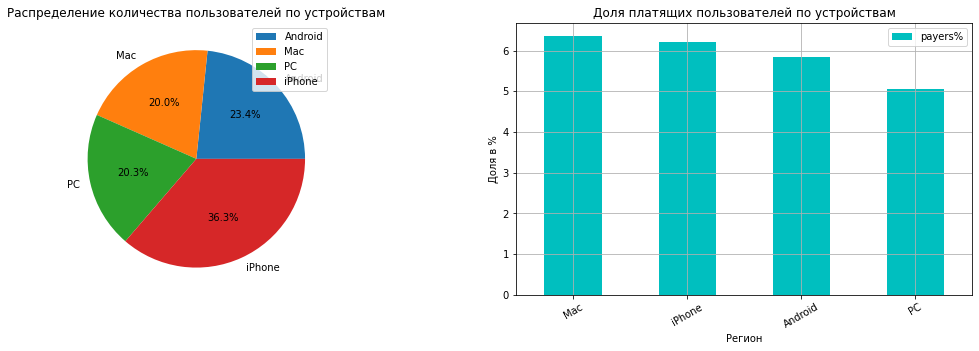

In [22]:
plt.figure(figsize=(18, 5))

# построим круговую диаграмму распределения утсройств по всем пользователям
ax1 = plt.subplot(1, 2, 1)
profiles_by_device.sort_values(by='device', ascending=True).plot.pie(
    y='user_id', labels=profiles_by_device['device'], autopct='%1.1f%%',
    title='Распределение количества пользователей по устройствам', ax=ax1
).set(ylabel=None)

# построим столбчатую диаграмму для доли платящих пользователей в рамках региона
ax2 = plt.subplot(1, 2, 2)
profiles_by_device.sort_values(by='payers%', ascending=False).plot.bar(
    x='device', y=['payers%'], grid=True,
    title='Доля платящих пользователей по устройствам',
    rot=30, color='c', ax=ax2
).set(xlabel='Регион', ylabel='Доля в %')
plt.show()

Более чем у 36% пользователей преобладает использование iPhone, что является ярким показателем его популярности. Однако, стоит отметить, что остальные типы устройств распределены сравнительно равномерно среди пользователей.

Важно отметить, что в случае доли платящих пользователей наблюдается интересная тенденция. Эта доля распределена более равномерно между различными типами устройств. Например, процент платящих пользователей среди пользователей Mac составляет 6.36%, что является самым высоким показателем, в то время как у пользователей PC этот процент немного ниже и составляет 5.05%. Это свидетельствует о том, что наблюдаемая активность в платежах не столь сильно зависит от конкретного типа устройства, нежели от его функциональных характеристик или предпочтений пользователей.

***Анализ рекламных источников привлечения***

In [23]:
 profiles_by_channel = (
    profiles.groupby('channel')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
# % пользователей каждого канала 
profiles_by_channel['users%'] = round(profiles_by_channel['user_id'] / profiles_by_channel['user_id'].sum() * 100, 2)
# % платящих внутри канала
profiles_by_channel['payers%'] = round(profiles_by_channel['payer'] / profiles_by_channel['user_id'] * 100, 2)

profiles_by_channel.sort_values(by='user_id', ascending=False)

,channel,user_id,payer,users%,payers%
10,organic,56439,1160,37.62,2.06
1,FaceBoom,29144,3557,19.43,12.20
6,TipTop,19561,1878,13.04,9.60
4,OppleCreativeMedia,8605,233,5.74,2.71
2,LeapBob,8553,262,5.70,3.06
7,WahooNetBanner,8553,453,5.70,5.30
5,RocketSuperAds,4448,352,2.97,7.91
3,MediaTornado,4364,156,2.91,3.57
8,YRabbit,4312,165,2.87,3.83
0,AdNonSense,3880,440,2.59,11.34


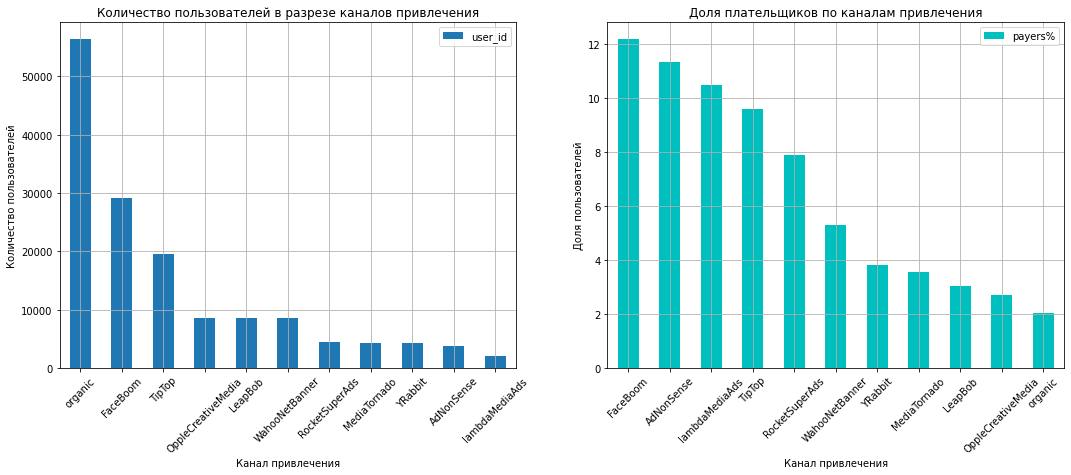

In [24]:
plt.figure(figsize=(18, 14))

ax1 = plt.subplot(2, 2, 1)
profiles_by_channel.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='channel', y=['user_id'],grid=True,
                                                           title='Количество пользователей в разрезе каналов привлечения', 
                                                           rot=45, ax=ax1).set(xlabel='Канал привлечения', 
                                                                               ylabel='Количество пользователей')
ax2 = plt.subplot(2, 2, 2)
profiles_by_channel.sort_values(by='payers%', ascending=False).plot.bar(
                                                             x='channel', y=['payers%'], grid=True,
                                                             title='Доля плательщиков по каналам привлечения',
                                                             rot=45, color='c', ax=ax2).set(xlabel='Канал привлечения', 
                                                                               ylabel='Доля пользователей')
plt.show()

Наибольшее количество пользователей приложения обнаруживают его самостоятельно, что составляет 56.5 тысяч пользователей. В то же время, на втором и третьем местах по количеству пользователей находятся каналы привлечения FaceBoom с 29 тысячами пользователей и TipTop с 19.5 тысячами пользователей соответственно.

Интересно отметить, что в топ-5 каналов привлечения пользователей по доле платящих клиентов входят FaceBoom (12,2%), AdNonSense (11,34%), lambdaMediaAds (10,47%), TipTop (9,6%) и RocketSuperAds (7,91%). Это свидетельствует о различной эффективности каналов в привлечении платящих клиентов.

Самостоятельно пришедшие пользователи, хотя и обладают самым высоким числом в общей аудитории, имеют наименьшую долю среди платящих, составляя всего лишь 2.06%. Это можно объяснить тем, что они, скорее всего, имеют более свободный и несвязанный с платными рекламными каналами доступ к приложению, что вносит различия в их поведении и мотивации к платежам.

***Вывод***

На основе проведенного анализа данных выявлены следующие важные закономерности:

Почти две трети пользователей приложения происходят из Америки, что свидетельствует о значительной доле пользователей из этого региона. В то же время, остальные регионы имеют более равномерное распределение пользователей.

Доля платящих пользователей в общем числе также преобладает в США, составляя почти 7%, в сравнении с приблизительно 4% в остальных странах. Это указывает на высокий уровень монетизации приложения в Соединенных Штатах.

iPhone является наиболее распространенным устройством среди пользователей, превышая 36%, в то время как остальные устройства распределены более равномерно.

Доля платящих пользователей также распределена более равномерно между различными устройствами, с наибольшей долей у пользователей Mac (6.36%) и наименьшей у пользователей PC (5.05%).

Огромное количество пользователей обнаруживают приложение самостоятельно (через organic поиск), что подтверждает его органическую популярность. Однако, важно отметить, что наибольшее количество пользователей привлекается через каналы FaceBoom и TipTop.

Среди топ-5 каналов привлечения пользователей наибольшая доля платящих клиентов обнаруживается в каналах FaceBoom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds, что указывает на их эффективность в привлечении пользователей, готовых совершать покупки в приложении.

Несмотря на высокое количество пользователей, обнаруживших приложение самостоятельно, их доля среди платящих пользователей является наименьшей, что, возможно, объясняется более органическим характером их взаимодействия с приложением.

### Маркетинг <a class="anchor" id="chapter4">
</a>

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

*** Расчет суммы расходов и анализ трат по рекламным источникам***

In [25]:
# находим общие затраты и доли расходов на рекламные каналы
profiles_by_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
profiles_by_costs['cost%'] =round((profiles_by_costs['costs'] / profiles_by_costs['costs'].sum())*100, 2)
profiles_by_costs

,costs,cost%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


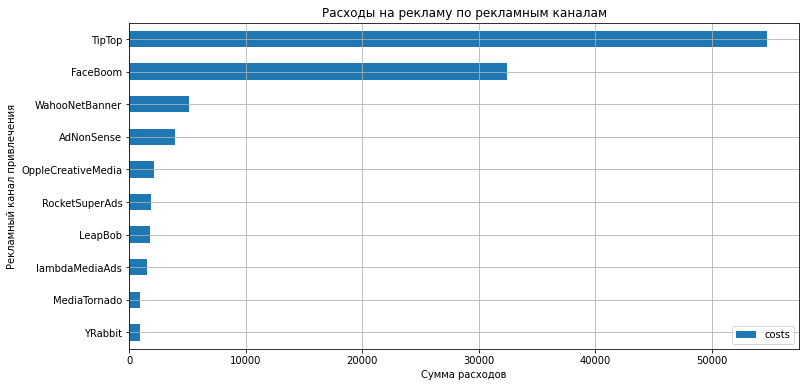

In [26]:
profiles_by_costs.sort_values(by='costs', ascending=True).plot.barh(y='costs',
                    grid=True,title='Расходы на рекламу по рекламным каналам',
                     figsize=(12,6)).set(ylabel='Рекламный канал привлечения', 
                     xlabel='Сумма расходов'
                      );

Анализ распределения бюджетов на различные рекламные каналы позволяет сделать следующие выводы:

Основная часть бюджета направлена на два основных канала: TipTop и FaceBoom. Их совокупные расходы составляют более 80% от общего объема бюджета, что подчеркивает их значимость в маркетинговой стратегии. Крупные инвестиции в эти каналы свидетельствуют о целенаправленном стремлении максимизировать охват и привлечение новых пользователей.

В отличие от крупных инвестиций в TipTop и FaceBoom, канал YRabbit получил наименьшее финансирование, что отражается в его невысоком процентном соотношении от общих расходов. Это может свидетельствовать о низкой эффективности этого канала или о его низком приоритете в маркетинговой стратегии.

При анализе этих данных важно учитывать не только общие суммы расходов, но и эффективность каждого канала в привлечении и удержании целевой аудитории. Это поможет оптимизировать бюджет и максимизировать возврат на инвестиции в маркетинговые кампании.

*** Анализ динамики расходов на каналы по времени***

In [27]:
pivot_channel_by_date = costs.reset_index().pivot_table(
                    index='dt', columns = 'channel', 
                    values = 'costs', aggfunc = 'sum')
pivot_channel_by_date.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,34.65,78.1,2.94,5.04,4.25,16.965,55.0,7.2,9.9,16.8
2019-05-03,47.25,85.8,2.73,6.96,5.75,16.380,64.0,8.4,9.0,16.8
2019-05-04,51.45,136.4,3.99,9.36,4.25,17.550,70.0,10.8,15.6,17.6
2019-05-05,36.75,122.1,4.62,11.04,5.50,27.495,78.0,12.0,9.6,12.8


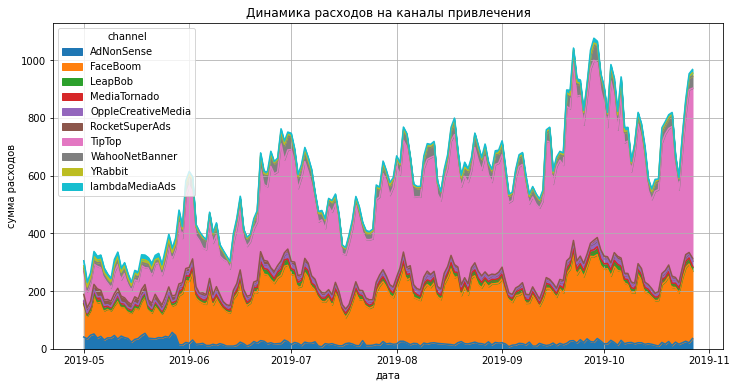

In [28]:
pivot_channel_by_date.plot.area(
                  grid=True, figsize=(12, 6), title = 'Динамика расходов на каналы привлечения').set(
                  xlabel = 'дата', ylabel = 'сумма расходов');

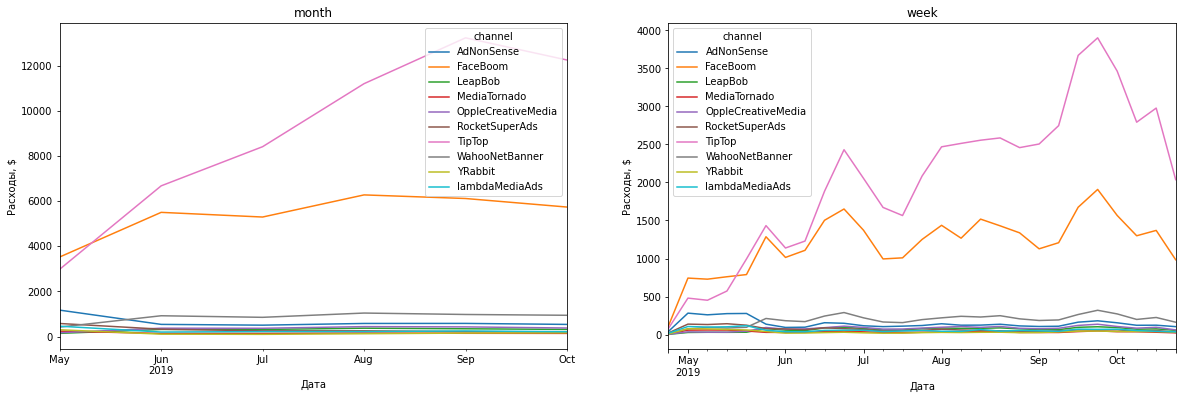

In [29]:
# создадим cтолбцы с датой в формате месяцев и недель
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')
columns = ['month', 'week']

# построим графики распределения расходов по месяцам и неделям
plt.subplots(figsize = (20, 6))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, $')
  
plt.show() 

Из анализа графиков можно сделать вывод о стратегии компании по привлечению пользователей. Очевидно, что компания делает основную ставку на каналы TipTop и FaceBoom. Это отражается в высоких пиках расходов на эти каналы, особенно в периоды второй половины июня и сентября.

Пиковые расходы в эти периоды могут быть связаны с особыми событиями или маркетинговыми кампаниями, которые целенаправленно направлены на увеличение присутствия компании на рынке или привлечение новых пользователей. Это может быть, например, связано с выходом нового продукта, проведением масштабных акций или сезонными трендами.

В то же время, расходы на остальные каналы остаются минимальными и практически не изменяются. Это может указывать на то, что компания сосредоточена на определенных каналах, которые считает наиболее эффективными или рентабельными, и предпочитает сохранять стабильные расходы на другие каналы для поддержания минимального присутствия.

*** Расчет среднего привлечения одного пользователя (CAC) из каждого источника***

In [30]:
 #группируем данные профилей клиентов по каналам привлечения и считаем среднее САС по каждому каналу
mean_cost_by_channel = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)
mean_cost_by_channel

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

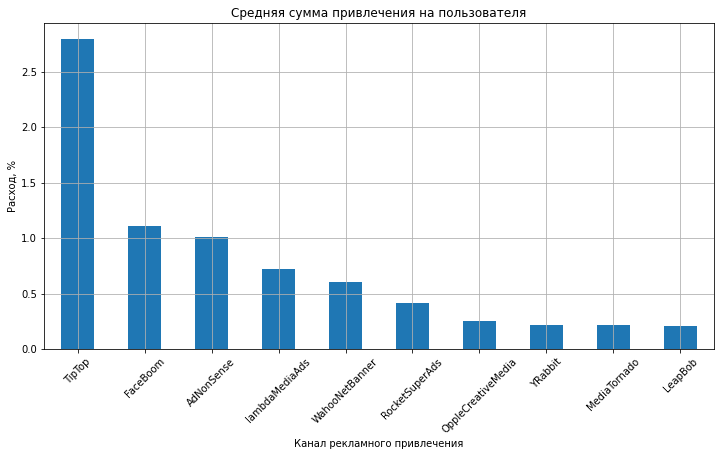

In [31]:
 mean_cost_by_channel.plot.bar(
                         grid=True, rot=45, title='Средняя сумма привлечения на пользователя', figsize=(12,6)).set(
                         xlabel="Канал рекламного привлечения", ylabel='Расход, %');

***Вывод***


В результате анализа маркетинговых данных обнаружены следующие ключевые наблюдения:

Общий рекламный бюджет, затраченный на привлечение пользователей, превысил 105 тысяч долларов.

Наибольшие суммы были направлены на рекламные каналы TipTop и FaceBoom, что составило более 80% от общих расходов. Это указывает на приоритетность этих каналов в маркетинговой стратегии компании.

Канал YRabbit получил наименьший бюджет, что свидетельствует о его низком приоритете в маркетинговых планах компании.

Расходы на канал FaceBoom имеют более равномерное распределение по времени, в то время как расходы на TipTop резко возрастают и имеют сильные скачки в определенные периоды, в частности, в июне и в конце сентября 2019 года.

Компания стратегически сосредоточилась на привлечении пользователей через каналы TipTop и FaceBoom, что подчеркивает их значимость в планах расширения клиентской базы.

Пиковые расходы приходятся на вторую половину июня и сентябрь, что может быть связано с сезонными колебаниями или специальными маркетинговыми мероприятиями.

Другие каналы привлечения получили минимальные бюджеты, и траты на них практически не изменяются со временем.

Наиболее дорогими каналами привлечения оказались TipTop, FaceBoom и AdNonSense, стоимость которых выше средней по всем каналам. Это свидетельствует о высокой ценности, которую эти каналы приносят компании в контексте привлечения новых пользователей.

### Оцените окупаемость рекламы <a class="anchor" id="chapter5">
</a>

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

***Анализ окупаемости рекламы***

In [32]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа
horizon_days = 14

In [33]:
profiles = profiles.query('channel != "organic"')
display('Количество профилей пользователей без organic:', len(profiles))

'Количество профилей пользователей без organic:'

93569

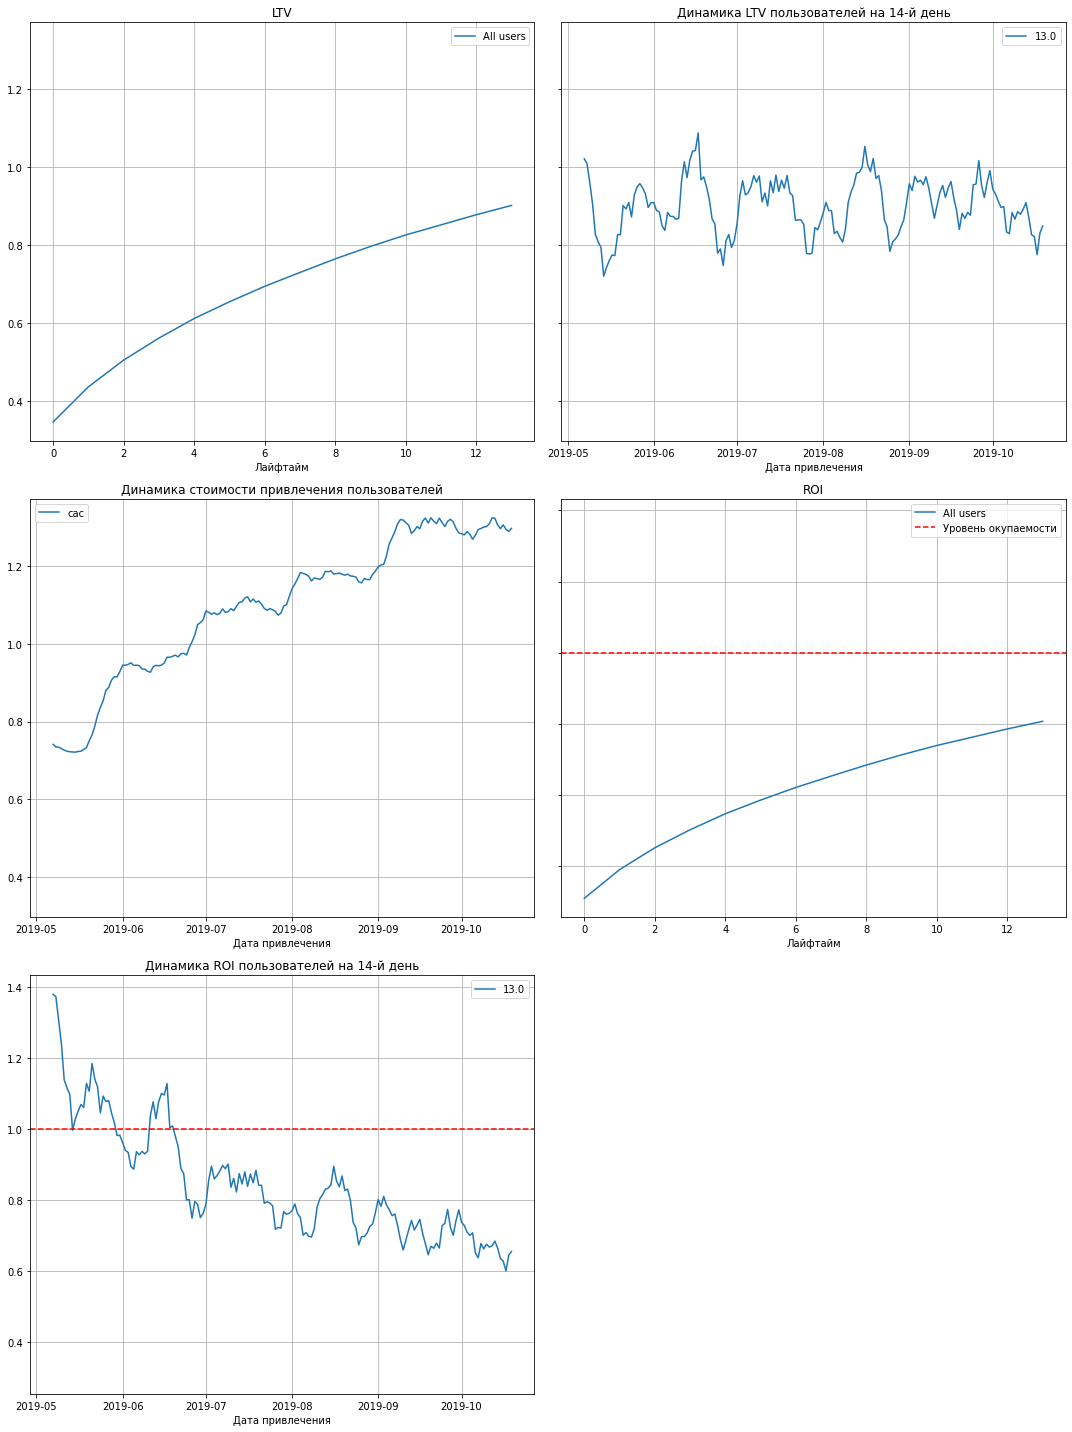

In [34]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

После анализа данных по LTV (пожизненной ценности клиента) можно сделать следующие выводы:

LTV показывает стабильный рост, что является положительным сигналом и соответствует ожиданиям. Однако, несмотря на это, к концу второй недели рекламная кампания так и не окупается, достигая лишь 80% от ожидаемых показателей. Это может указывать на необходимость рассмотрения и оптимизации маркетинговых стратегий для повышения эффективности кампании.

На графике динамики LTV отмечаются небольшие колебания, возможно связанные с отрицательной динамикой, характеризующейся спадами и подъемами. Это может указывать на некоторую нестабильность в поведении клиентов или в самой экономической ситуации.

Стоимость привлечения пользователей постоянно растет, при этом окупаемость, выраженная в динамике ROI (индекса окупаемости инвестиций), снижается. Это может быть связано с ростом стоимости рекламы, который неуклонно увеличивается со временем.

Вероятная причина снижения ROI - высокая стоимость рекламы, которая может привести к неэффективному использованию маркетинговых ресурсов. В таком случае, возможно, потребуется пересмотр стратегий привлечения пользователей и поиск более эффективных каналов распространения, чтобы обеспечить устойчивый рост и окупаемость рекламной кампании.

***Анализ конверсии и удержания***

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


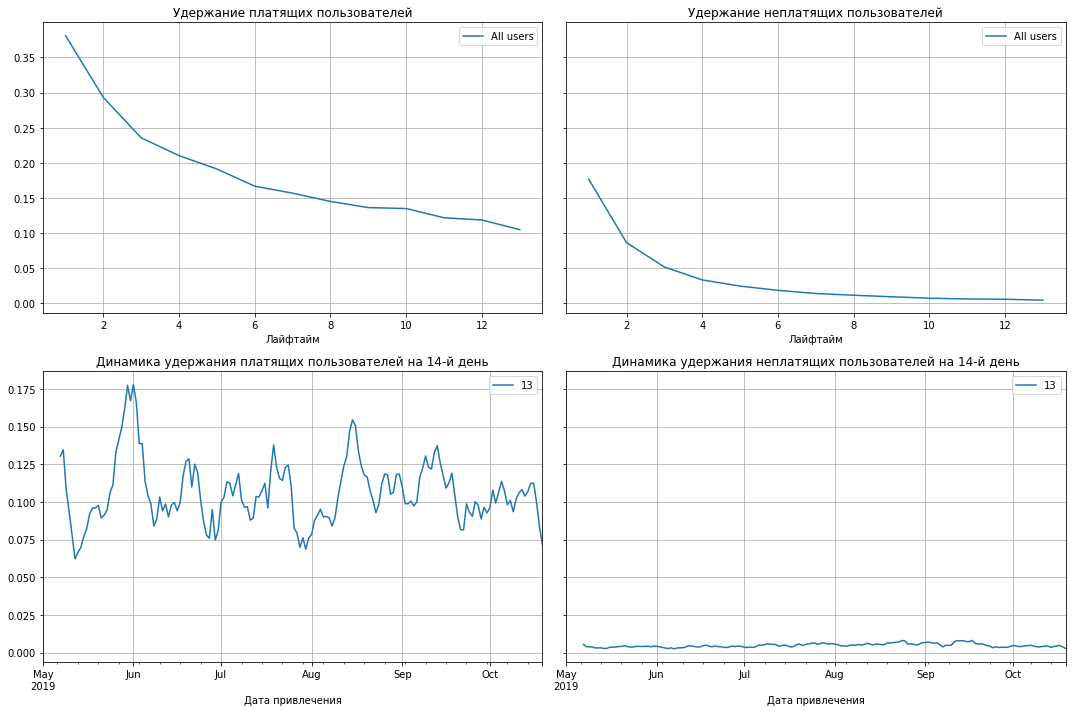

In [35]:
# передадим функции нужные датасеты, момент и горизонт анализа
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days)
display(retention_grouped) # выведем на экран таблицу удержания
plot_retention(retention_grouped, retention_history, horizon_days) # построим графики для платящих и неплатящих пользователей

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


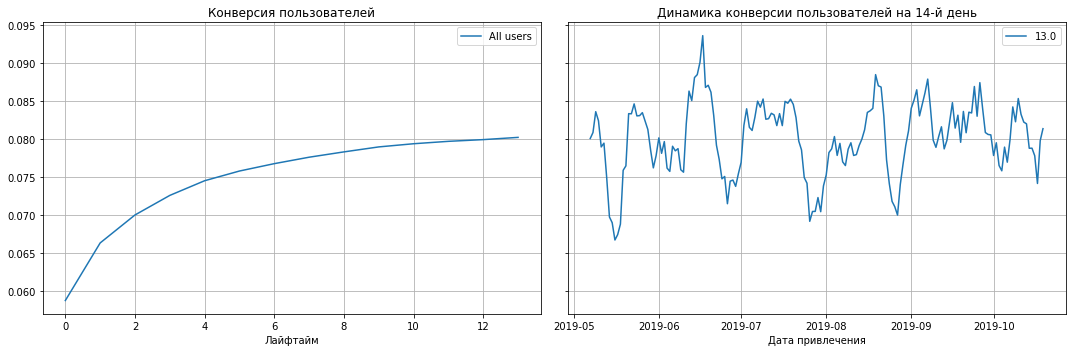

In [36]:
 conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
display(conversion_grouped)# выведем на экран таблицу конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days)# построим графики конверсии

После проведения анализа пользовательской активности можно выделить следующие ключевые моменты:

Количество неплатящих пользователей значительно превышает количество платящих - разница составляет 16 раз. Однако, несмотря на это, удержание платящих пользователей оказывается эффективнее.

Продолжительность использования приложения среди платящих пользователей также демонстрирует определенную стабильность: 10% платящих пользователей продолжают пользоваться приложением и спустя 2 недели после привлечения.

Удержание неплатящих пользователей к концу второй недели стремится к нулю, что может свидетельствовать о низкой лояльности данной категории пользователей или о неэффективности методов их удержания.

К концу второй недели конверсия в платящих пользователей составляет 8%, и эта динамика остается стабильной. Это может указывать на относительную эффективность привлечения новых пользователей и удержания их в качестве платящих клиентов.

***Категориальный анализ окупаемости через призму устройств***

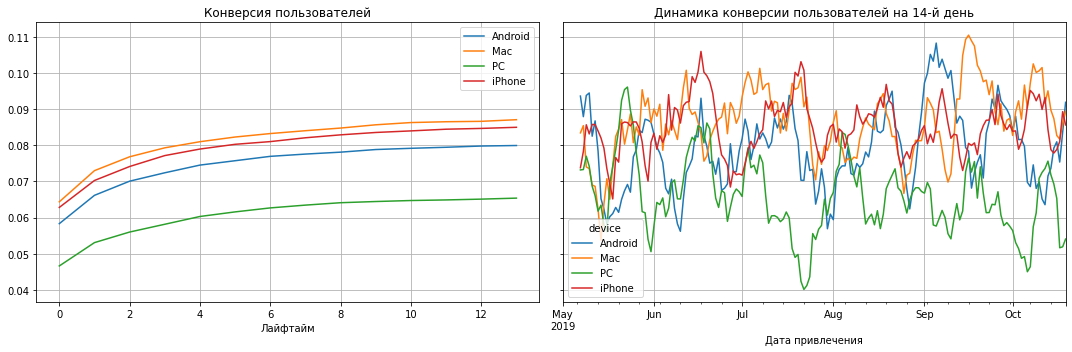

In [37]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

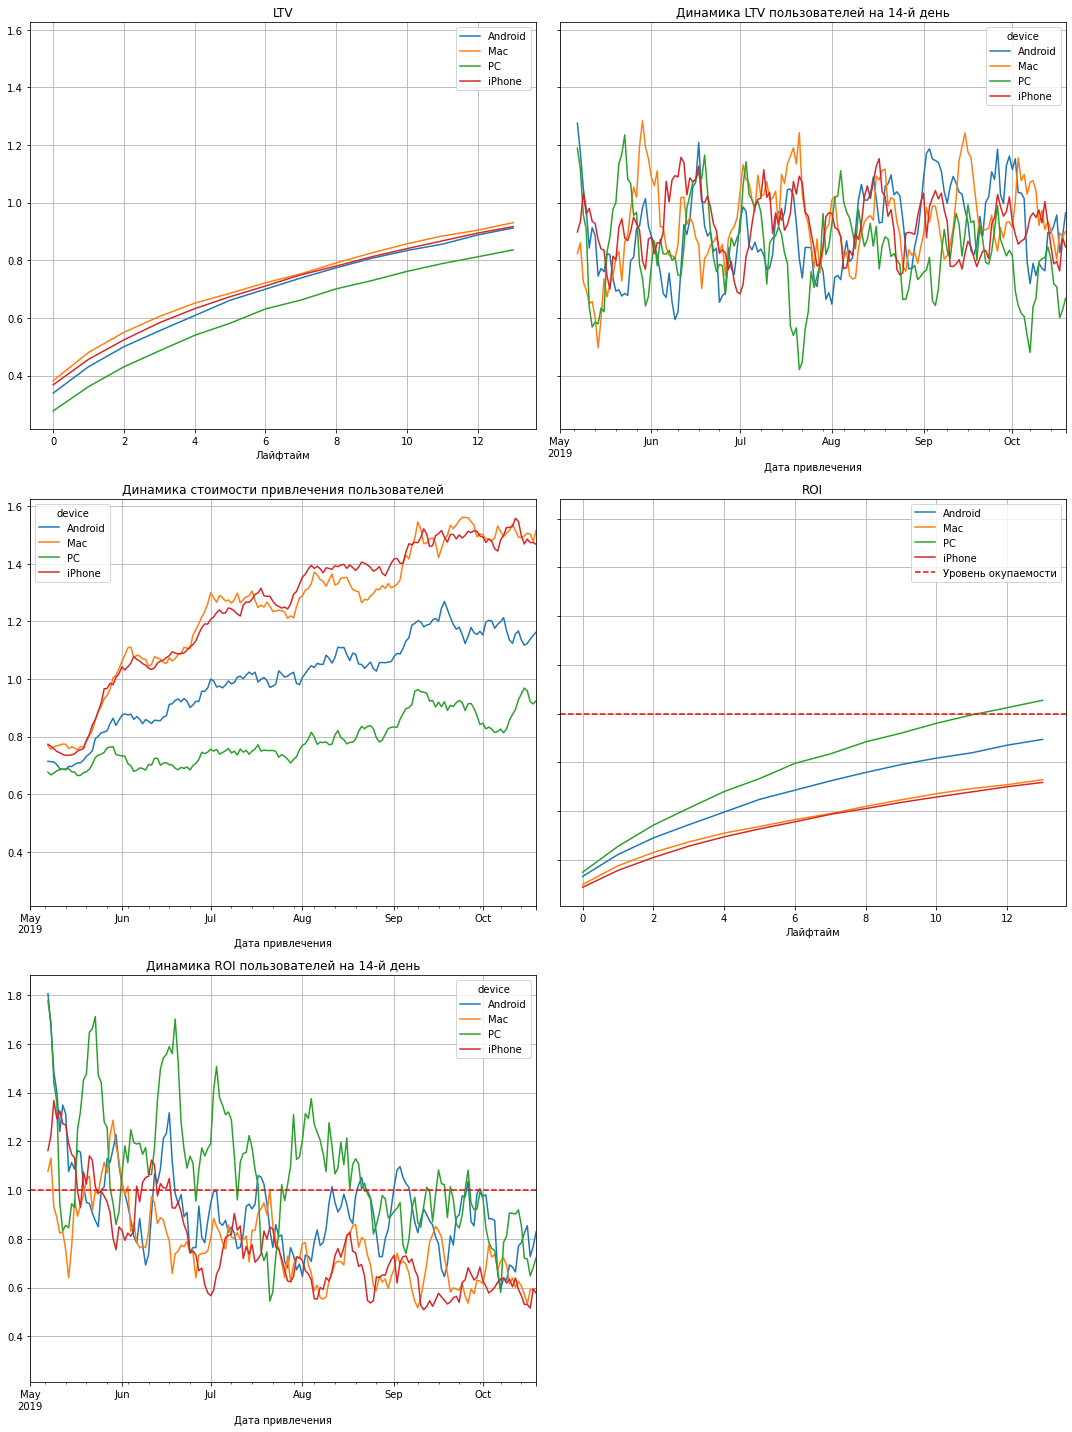

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days,
                                                                      dimensions = ['device']) 
# передадим функции нужные датафреймы, дату и горизонт анализа, которые мы задали выше
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) #построим графики

После тщательного анализа можно сделать следующие выводы о пользовательском поведении в зависимости от типа устройства и эффективности рекламных кампаний:

Жизненная ценность (LTV) пользователей PC демонстрирует самые низкие показатели среди всех типов устройств. Тем не менее, на седьмой день после установки приложения, пользователи устройств PC обеспечивают самую высокую окупаемость. Это объясняется тем, что стоимость рекламы для устройств PC заметно ниже по сравнению с другими устройствами, и она оставалась более стабильной на протяжении нескольких месяцев.

Наиболее дорогая реклама приходится на устройства iPhone и Mac, но она не окупается. Это связано с тем, что LTV для этих устройств постоянно растет, что указывает на высокий потенциал в генерации дохода от пользователей. Вероятно, отсутствие окупаемости обусловлено высокой стоимостью рекламы на этих устройствах.

Для приложений на устройствах PC реклама окупается к концу второй недели. Это может быть связано с более низкой стоимостью рекламы на PC и, как следствие, более быстрой окупаемостью.

Наблюдается отрицательная динамика ROI, что означает снижение окупаемости с ростом стоимости рекламы. Это подчеркивает необходимость оптимизации маркетинговых стратегий и поиска более эффективных способов привлечения пользователей, чтобы обеспечить стабильную и позитивную динамику ROI.

***Анализ окупаемости в разрезе по странам***

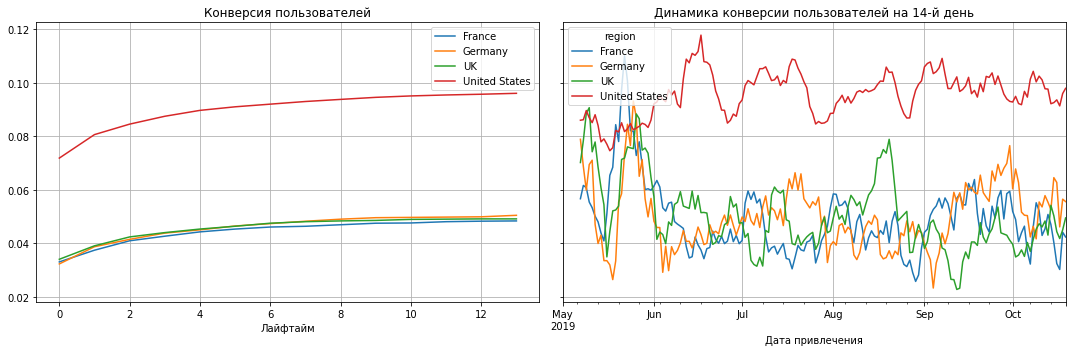

In [39]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

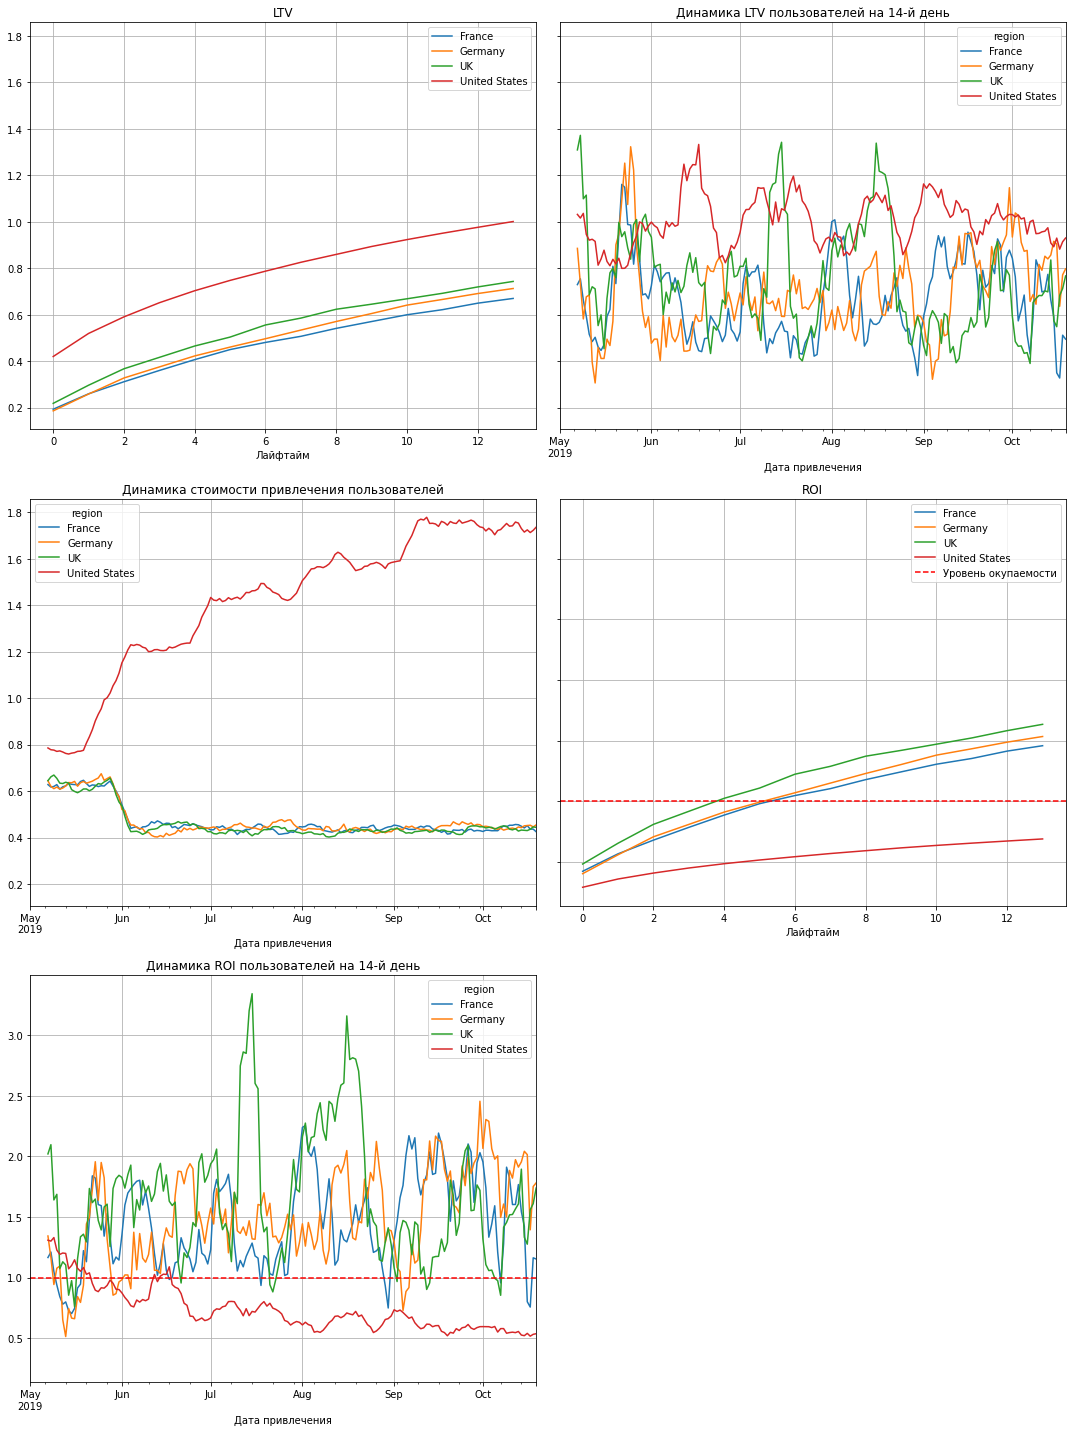

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days,
                                                                      dimensions = ['region']) 
# передадим функции нужные датафреймы, дату и горизонт анализа, которые мы задали выше
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) #построим графики

Анализ показателей окупаемости по странам приводит к следующим важным наблюдениям:

Графики показывают, что пользователи из США выделяются на общем фоне по ряду показателей. Они обладают наибольшим значением LTV по сравнению с пользователями из других стран. В то же время, расходы на рекламу в США постоянно растут и значительно превышают аналогичные показатели для других стран.

Как результат, США становятся единственной страной, где уровень окупаемости опускается ниже допустимого порога в 100%. Фактически, ROI для США упал почти до 60%. Это свидетельствует о том, что убытки от привлечения пользователей из США полностью перекрывают доходы от окупаемых стран.

Из этого можно сделать вывод о значительной роли рынка США в общей картины. Составляя 66% от общего количества пользователей, этот рынок имеет ключевое значение для компании. Однако, высокие расходы на привлечение пользователей в США, не сопровождающиеся достаточно высоким уровнем окупаемости, могут привести к финансовым потерям. В отличие от других регионов, где стоимость привлечения пользователя стабильна и маркетинговые расходы окупаются в течение недели, в США ситуация выглядит менее устойчиво.

***Конверсия в разрезе по странам***

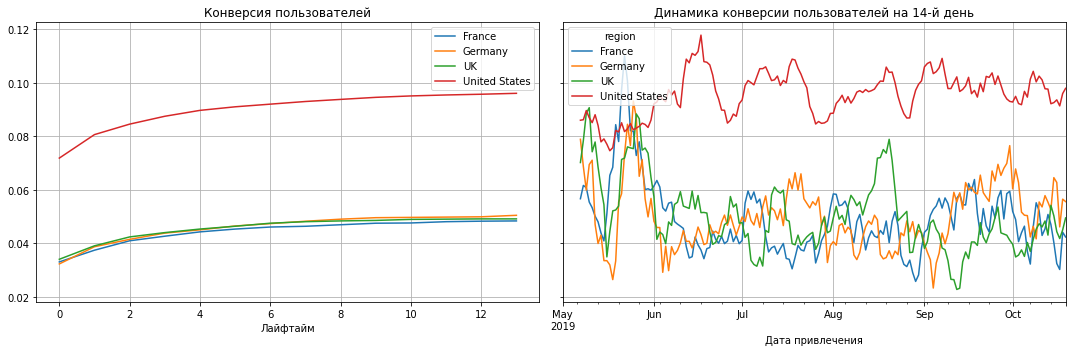

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon_days,
                                                                        dimensions = ['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

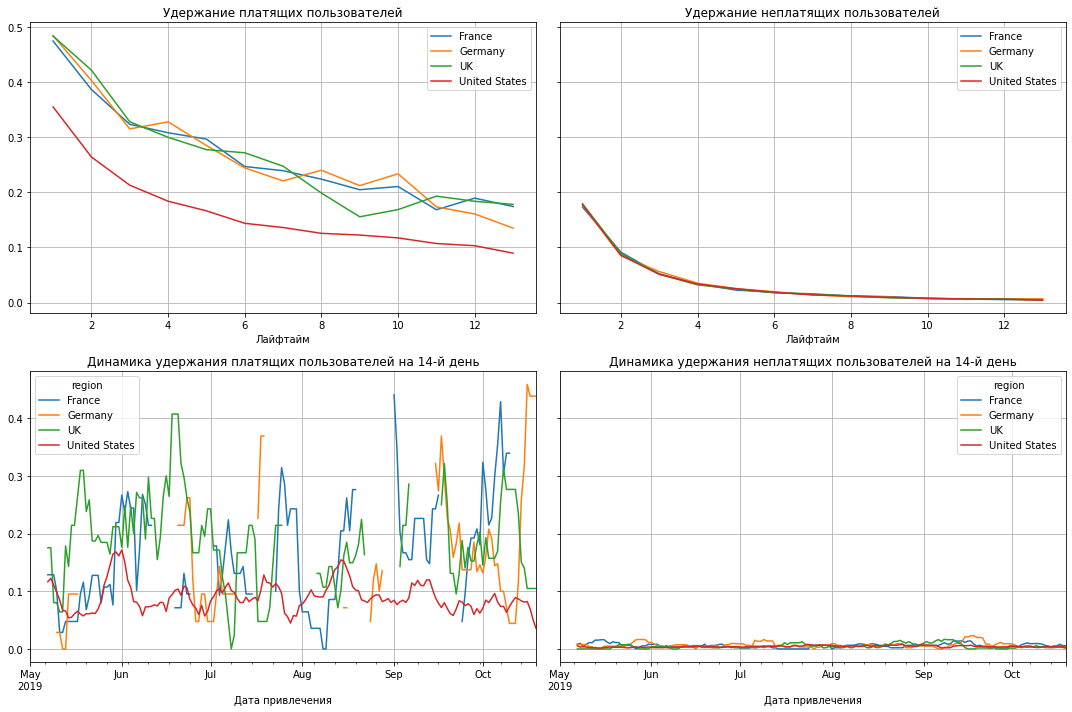

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из США очень хорошо конвертируются, однако не окупаются. Причина в дорогой рекламе.

***Окупаемость рекламы с разбивкой по каналам привлечения***

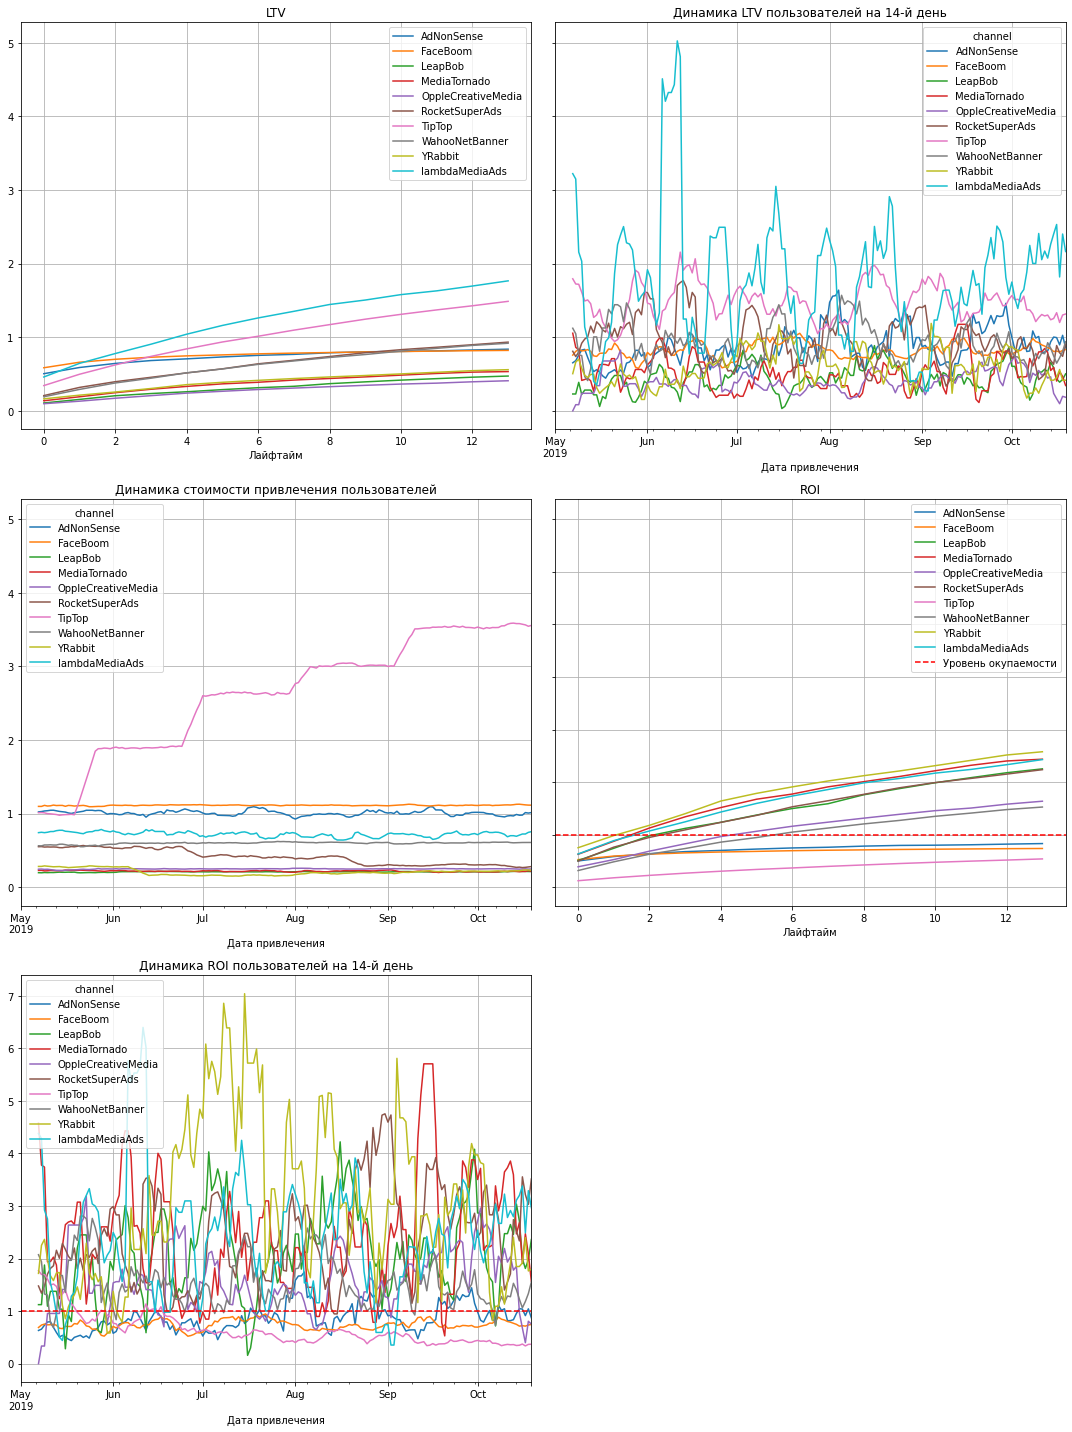

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days,
                                                                      dimensions = ['channel']) 
# передадим функции нужные датафреймы, дату и горизонт анализа, которые мы задали выше
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) #построим графики

Из визуализации данных следует, что динамика рекламного канала TipTop обнаруживает ступенчатый рост. Однако, несмотря на этот рост, этот канал отличается самым низким показателем ROI. Предполагается, что ключевая причина заключается именно в этой нестандартной динамике увеличения стоимости. Вероятно, этот канал играет ключевую роль в привлечении клиентов в Соединенных Штатах.

Для полного понимания ситуации следует провести дополнительный анализ, разделив показатели по каналам на две группы: данные по Америке и данные по остальным странам. Такой подход позволит выявить, в какой степени канал TipTop действительно влияет на рынок США и как эффективно он работает в других регионах.

Анализ этих данных поможет выявить, какие каналы являются более эффективными в разных регионах и какие стратегии маркетинга могут быть оптимизированы для улучшения показателей ROI в каждом из них.

***Конверсия и удержание с разбивкой по каналам привлечения***

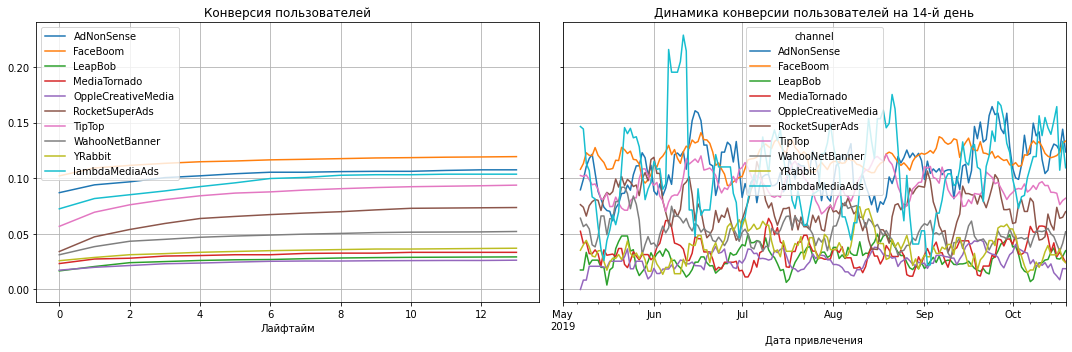

In [44]:
# смотрим конверсию с разбивкой по странам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

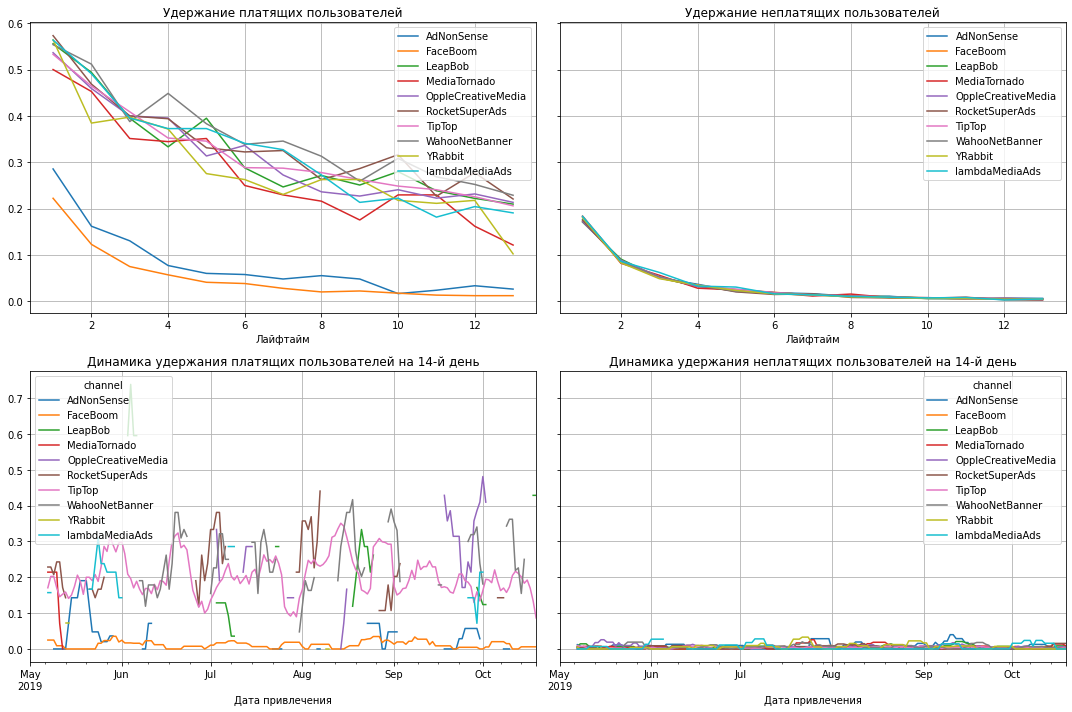

In [45]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
Учел эти находки в выводе.
</div>

***Вывод***


Анализируя данные о рекламных платформах, следующие выводы могут быть сделаны:

Три платформы - YRabbit, RocketSuperAds и MediaTomado - достигают окупаемости уже на третий день. Однако, они имеют более низкий уровень LTV. Это может быть связано с их низкой стоимостью размещения.

Реклама на платформе FaceBoom не окупается, даже при относительно низкой стоимости размещения, и имеет не очень высокий показатель LTV. В то же время реклама на других платформах также не окупается за две недели. На платформе TipTop стоимость размещения постоянно растет, что может быть одной из причин отсутствия окупаемости, несмотря на высокий показатель LTV.

Европейский канал AdNonSense демонстрирует очень низкий показатель удержания платящих пользователей, несмотря на более высокий уровень конверсии по сравнению с другими каналами. Остальные каналы примерно равны по уровню удержания платящих пользователей.

Рекламная платформа AdNonSense показывает очень хорошую высокую конверсию, однако не окупается, даже при невысокой стоимости размещения.

Проблемы с окупаемостью могут быть вызваны неравномерным распределением средств на рекламу, где некоторым источникам было выделено больше средств, чем другим, но они не оправдали ожиданий. Также возможно, что период анализа недостаточен для того, чтобы пользователи окупились, и требуется дополнительное время для оценки эффективности рекламных кампаний.

### Напишите выводы <a class="anchor" id="chapter6">
</a>

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

При анализе эффективности привлечения пользователей выявлены следующие факторы:

Предобработка данных: Были выполнены необходимые действия по предобработке данных, такие как стандартизация названий столбцов и приведение типов временных данных. В целом данные представлены в хорошем виде, без пропусков и дубликатов, что упростило анализ.

Анализ данных: Обнаружена проблема с окупаемостью рекламных кампаний. Динамика LTV остается стабильной, в то время как расходы на привлечение пользователей (САС) постоянно растут, что приводит к снижению окупаемости. Важные наблюдения:

Большинство пользователей и платящих пользователей приходится на США.
Реклама на устройствах iPhone является наиболее распространенной, однако она не окупается.
Самостоятельно пришедшие пользователи имеют наименьшую долю среди платящих.

Категориальный анализ окупаемости: Основная проблема заключается в том, что реклама не окупается к концу второй недели. Пользователи всех устройств не окупаются стабильно, за исключением пользователей ПК, однако их ROI также падает. В американском рынке выделяются пользователи из США, у которых самый высокий LTV, но и самые большие расходы на рекламу. В результате ROI падает ниже 100%.

Рекомендации для отдела маркетинга:

Следует перераспределить бюджет на рекламные каналы с более высокой окупаемостью.

Необходимо обратить внимание на устройства с высокой стоимостью привлечения, такие как iPhone и Mac, и пересмотреть стратегию привлечения на них.

Стоит персонализировать предложения и улучшить удержание пользователей из США, пришедших из рекламных каналов FaceBoom и AdNonSense.

Использование более эффективных каналов привлечения, таких как YRabbit, MediaTornado и RocketSuperAds в США, а также lambdaMediaAds и LeapBob в Европе, может помочь увеличить окупаемость рекламы.

В целом, перераспределение бюджета и персонализированный подход к привлечению и удержанию пользователей могут существенно улучшить эффективность маркетинговых кампаний и повысить окупаемость.

Отказаться от FaceBoom и перенаправить рекламные средства в пользу других каналов;

Выявить причину роста САС канала TipTop и по возможности устранить ее. Если это невозможно, то отказаться от этой рекламной площадки в пользу других;

Достаточно перспективным выглядит RocketSuperAds (низкий САС, неплохое привлечение и удержание, конверсия на уровне);